### CODE CHALLENGE - DATA ANALYST

In [64]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Read JSON file

ratings_df = pd.read_json('rating_per_user.json', lines=True)

In [66]:
# Explore the dataset

print(ratings_df.info())
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206396 entries, 0 to 206395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ratingType    206396 non-null  object
 1   ratings       206396 non-null  object
 2   ratings_date  206396 non-null  object
 3   nof_reviews   206396 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.3+ MB
None


,ratingType,ratings,ratings_date,nof_reviews
0,SellerToBuyer,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-27, 2021-01-13, 2021-01-13, 2021-02-0...",86
1,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-09, 2021-01-09, 2021-01-09, 2021-01-0...",85
2,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-01, 2021-01-01, 2021-01-20, 2021-01-2...",29
3,SellerToBuyer,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-31, 2021-01-31, 2021-01-31, 2021-01-1...",28
4,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-22, 2021-01-22, 2021-01-22, 2021-01-2...",24


### 1.1 What is the period where these ratings were collected?

In [67]:
# Transform dates to calculate period

from datetime import datetime

date_array = np.array(ratings_df['ratings_date'])
#dates_list = [datetime.strptime(d,'%Y-%m-%d') for d in date_list]
date_df = pd.DataFrame(np.concatenate(date_array).tolist())

print("Initial date:", date_df.min()[0])
print("Final date:", date_df.max()[0])

Initial date: 2021-01-01
Final date: 2021-02-14


##### ANSWER 1: The ratings were taken between the 01-01-2021 and the 14-02-2021, and every day all the 

### 1.2 What is the distribution of the number of received ratings per user?

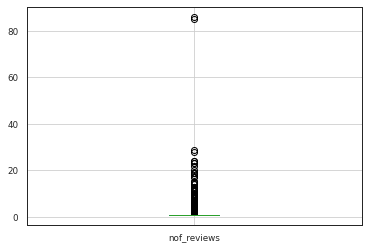

In [68]:
# For first impression of the data, plotting boxplot to detect if there are any outliers

ratings_df.boxplot(column='nof_reviews')

In [69]:
# Statistics of the number of reviews

print("Median:", ratings_df.median())
ratings_df.describe()

Median: nof_reviews    1.0
dtype: float64


,nof_reviews
count,206396.000000
mean,1.038431
std,0.435590
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,86.000000


In [70]:
# From the initial statistics, at least, 75% of users rated just one transaction.
# From the boxplot of the number of reviews, I see that there are two users that reviewed a lot of transactions, 
# much more than the average user, and that most users rate very few transactions (average of 1 transaction per user).

In [71]:
# Count of number of reviews per user and its percentage

rating_counts = ratings_df['nof_reviews'].value_counts()
rating_counts_df = pd.DataFrame(rating_counts)
rating_counts_df['percentage_of_users'] = (rating_counts_df['nof_reviews'] / rating_counts_df['nof_reviews'].sum() * 100)
rating_counts_df.head(10)

,nof_reviews,percentage_of_users
1,201163,97.464583
2,4175,2.022811
3,596,0.288765
4,193,0.093510
5,82,0.039729
6,51,0.024710
7,42,0.020349
8,33,0.015989
10,13,0.006299
9,12,0.005814


In [72]:
# As confirmed, it is a positively skewed distribution. More than 97% of users rated just 1 transaction, followed by 2% of users who rated 2 transactions.
# Since it appears to be a right skewed (non-symmetrical) distribution, I am going to plot different graphs to examine it.

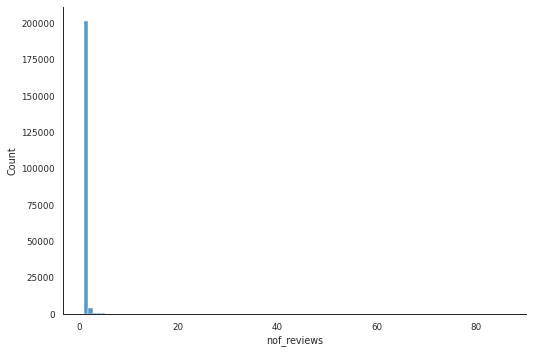

In [73]:
# Plotting of the ratings distribution

sns.set_style('white')
sns.set_context('paper', font_scale = 1)
sns.displot(data=ratings_df, x='nof_reviews', kind='hist', bins = 100, aspect = 1.5)

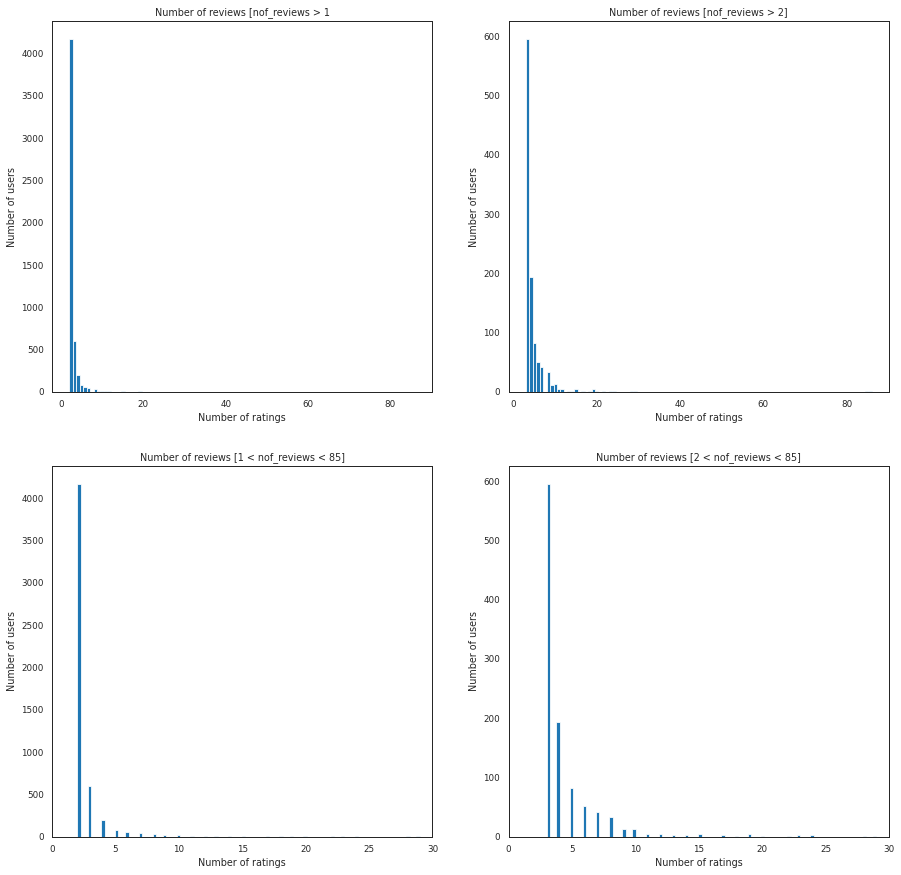

In [74]:
# Representation of number of ratings excluding outliers (nof_reviews > 84) and/or excluding the lowest number of ratings per user (1 and 2 reviews),
# to be able to observe closely the distribution.

num_rat_higher1 = ratings_df.drop((ratings_df.index[ratings_df["nof_reviews"] < 2]), axis=0)
num_rat_higher2 = ratings_df.drop((ratings_df.index[ratings_df["nof_reviews"] < 3]), axis=0)
num_rat_higher1_lower85 = num_rat_higher1.drop((ratings_df.index[ratings_df["nof_reviews"] > 84]), axis=0)
num_rat_higher2_lower85 = num_rat_higher2.drop((ratings_df.index[ratings_df["nof_reviews"] > 84]), axis=0)

fig = plt.figure(figsize =(15, 15))
plt.subplot(2, 2, 1)
plt.hist(num_rat_higher1['nof_reviews'], bins=100)
plt.title("Number of reviews [nof_reviews > 1")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")

plt.subplot(2, 2, 2)
plt.hist(num_rat_higher2['nof_reviews'], bins=100)
plt.title("Number of reviews [nof_reviews > 2]")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")

plt.subplot(2, 2, 3)
plt.hist(num_rat_higher1_lower85['nof_reviews'], bins=100)
plt.title("Number of reviews [1 < nof_reviews < 85]")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")
plt.xlim(0, 30)


plt.subplot(2, 2, 4)
plt.hist(num_rat_higher2_lower85['nof_reviews'], bins=100)
plt.title("Number of reviews [2 < nof_reviews < 85]")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")
plt.xlim(0, 30)

plt.show()

In [75]:
# The distribution is highly skewed to the right, which means that most users rate between 1 to 3 transactions (average is just above 1 transaction per user).

Text(0, 0.5, 'Number of users (log10)')

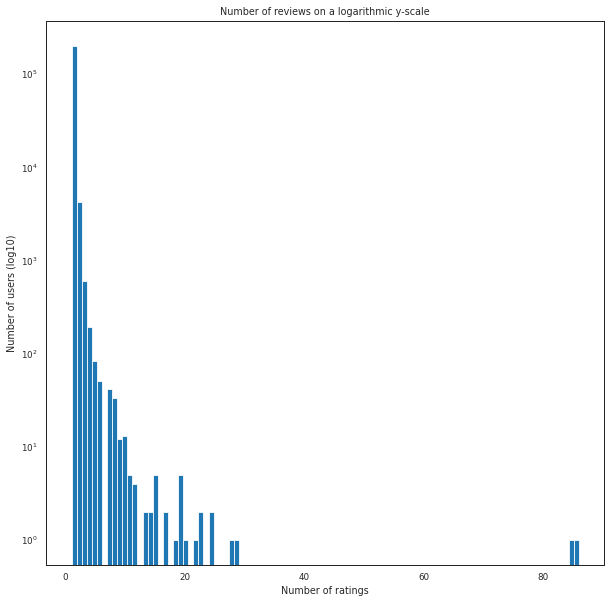

In [76]:
# A better representation of highly skewed distributions is on a logarithmic scale

plt.figure(figsize =(10, 10))
plt.hist(ratings_df['nof_reviews'], bins=100, log=True)
plt.title("Number of reviews on a logarithmic y-scale")
plt.xlabel("Number of ratings")
plt.ylabel("Number of users (log10)")

In [77]:
pip install fitter

,sumsquare_error,aic,bic,kl_div
norm,0.279800,1.267563e+06,-2.788639e+06,inf
chi2,0.365670,1.768110e+04,-2.733385e+06,inf
gamma,1.312610,7.161255e+03,-2.469602e+06,inf
beta,1.315367,3.695823e+05,-2.469156e+06,inf
weibull_min,1.315368,8.069350e+04,-2.469169e+06,inf


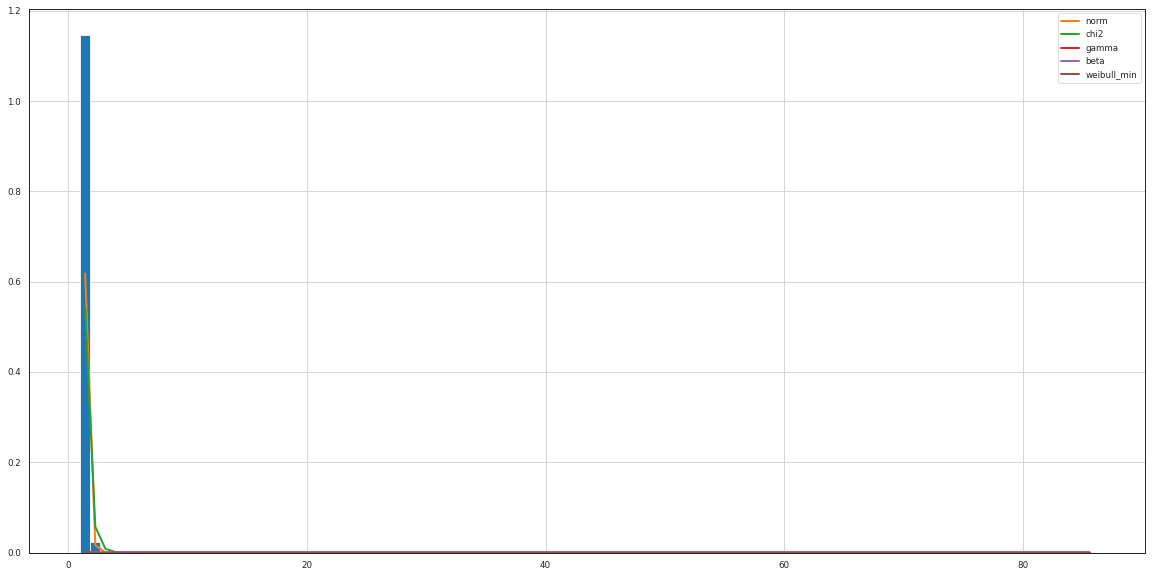

In [78]:
# Fitting different distributions and finding out the best-suited distribution for the data.
# Sum-of-square error will give the indication of best-suited distribution.

from fitter import Fitter

num_ratings = ratings_df['nof_reviews'].values
plt.figure(figsize =(20, 10))
f = Fitter(num_ratings, distributions=['gamma', 'lognorm', "beta", "norm", 'weibull_max', 'weibull_min', 'chi2'])
f.fit()
f.summary()

In [79]:
# Choose the distribution that best fits the data

f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 1.0384309773445222, 'scale': 0.435589262960453}}

#### ANSWER 2: The distribution of the received number of reviews best fits a positively skewed (non-symmetric) normal distribution.

## 1.3 What is the average of the rating value?

In [80]:
# Average rating per user

#ratings_array = np.array(ratings_df['ratings'])
#ratings_df['ratings'] = [[float(j) for j in i] for i in ratings_array]
ratings_df['ratings_mean'] = pd.DataFrame(ratings_df['ratings'].values.tolist()).mean(1)
ratings_df.head()

,ratingType,ratings,ratings_date,nof_reviews,ratings_mean
0,SellerToBuyer,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-27, 2021-01-13, 2021-01-13, 2021-02-0...",86,5.0
1,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-09, 2021-01-09, 2021-01-09, 2021-01-0...",85,5.0
2,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-01, 2021-01-01, 2021-01-20, 2021-01-2...",29,5.0
3,SellerToBuyer,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-31, 2021-01-31, 2021-01-31, 2021-01-1...",28,5.0
4,BuyerToSeller,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-22, 2021-01-22, 2021-01-22, 2021-01-2...",24,5.0


Average rating: 4.904674859116564


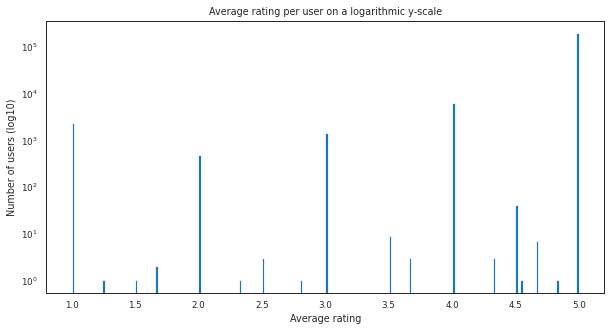

In [81]:
# Histogram of the average ratings per user

plt.figure(figsize =(10, 5))
plt.hist(ratings_df['ratings_mean'], bins=200, log=True)
plt.title("Average rating per user on a logarithmic y-scale")
plt.xlabel("Average rating")
plt.ylabel("Number of users (log10)")

# Total average of ratings

print("Average rating:", ratings_df['ratings_mean'].mean())

##### ANSWER 3: The average of all the ratings is 4.904.

### 1.4 What differences are there between ratings SellerToBuyer and BuyerToSeller?

In [82]:
# Total number of reviews and the average rating per ratingType

grouped = ratings_df.groupby('ratingType').agg({'nof_reviews':'sum', 'ratings_mean':'mean'})
grouped

,nof_reviews,ratings_mean
ratingType,,
BuyerToSeller,84932,4.880167
SellerToBuyer,129396,4.920779


Text(0, 0.5, 'Number of users (log10)')

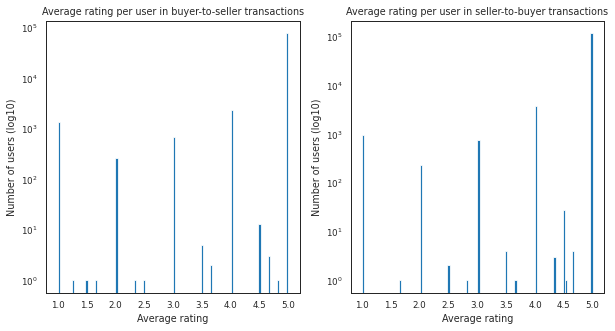

In [83]:
# Plots to compare the ratings between the two types of transactions

ratings_BtS = ratings_df[ratings_df['ratingType'] == 'BuyerToSeller']
ratings_StB = ratings_df[ratings_df['ratingType'] == 'SellerToBuyer']
plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
plt.hist(ratings_BtS['ratings_mean'], bins=100, log=True)
plt.title("Average rating per user in buyer-to-seller transactions")
plt.xlabel("Average rating")
plt.ylabel("Number of users (log10)")

plt.subplot(1, 2, 2)
plt.hist(ratings_StB['ratings_mean'], bins=100, log=True)
plt.title("Average rating per user in seller-to-buyer transactions")
plt.xlabel("Average rating")
plt.ylabel("Number of users (log10)")

Text(0, 0.5, 'Number of sellers (log10)')

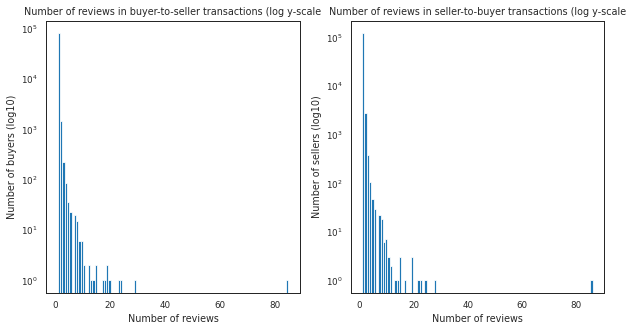

In [84]:
nof_reviews_BtS = ratings_df[ratings_df['ratingType'] == 'BuyerToSeller']
nof_reviews_StB = ratings_df[ratings_df['ratingType'] == 'SellerToBuyer']
plt.figure(figsize =(10, 5))
plt.subplot(1, 2, 1)
plt.hist(nof_reviews_BtS['nof_reviews'], bins=100, log=True)
plt.title("Number of reviews in buyer-to-seller transactions (log y-scale")
plt.xlabel("Number of reviews")
plt.ylabel("Number of buyers (log10)")

plt.subplot(1, 2, 2)
plt.hist(nof_reviews_StB['nof_reviews'], bins=100, log=True)
plt.title("Number of reviews in seller-to-buyer transactions (log y-scale")
plt.xlabel("Number of reviews")
plt.ylabel("Number of sellers (log10)")

##### ANSWER 4:  There are aproximately 40% more seller-to-buyer reviews than buyer-to-seller reviews. This makes sense since the seller is interested in keeping a good review rate for the future.
##### The average rating is aproximately the same in both cases (around 5) and the average number of ratings is also the same (1 rating per user).

### 3 Do a model to rank the users with the information that you have.

In [85]:
# Transform categorical column ratinType to numerical (1: SellerToBuyer, 0: BuyerToSeller)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ratings_df['ratingType'] = le.fit_transform(ratings_df['ratingType'])

ratings_df.head()

,ratingType,ratings,ratings_date,nof_reviews,ratings_mean
0,1,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-27, 2021-01-13, 2021-01-13, 2021-02-0...",86,5.0
1,0,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-09, 2021-01-09, 2021-01-09, 2021-01-0...",85,5.0
2,0,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-01, 2021-01-01, 2021-01-20, 2021-01-2...",29,5.0
3,1,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-31, 2021-01-31, 2021-01-31, 2021-01-1...",28,5.0
4,0,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2021-01-22, 2021-01-22, 2021-01-22, 2021-01-2...",24,5.0


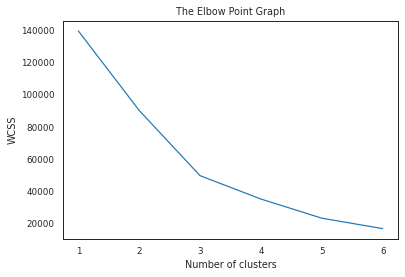

In [86]:
# Calculation of WCSS to find the optimum number of clusters

ratings_df.drop(['ratings', 'ratings_date'], axis=1, inplace=True)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(ratings_df)
    wcss.append(kmeans.inertia_)  
    
# Elbow graph

plt.plot(range(1, 7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25 )

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(ratings_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
# Successful identification of the clusters

print("Cluster center:", kmeans_model.cluster_centers_)
ratings_df['cluster'] = kmeans_model.labels_

Cluster center: [[1.03361764e-12 1.03823049e+00 4.97094592e+00]
 [1.00000000e+00 1.03903243e+00 4.96862064e+00]
 [4.59857482e-01 1.02470309e+00 1.78971892e+00]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


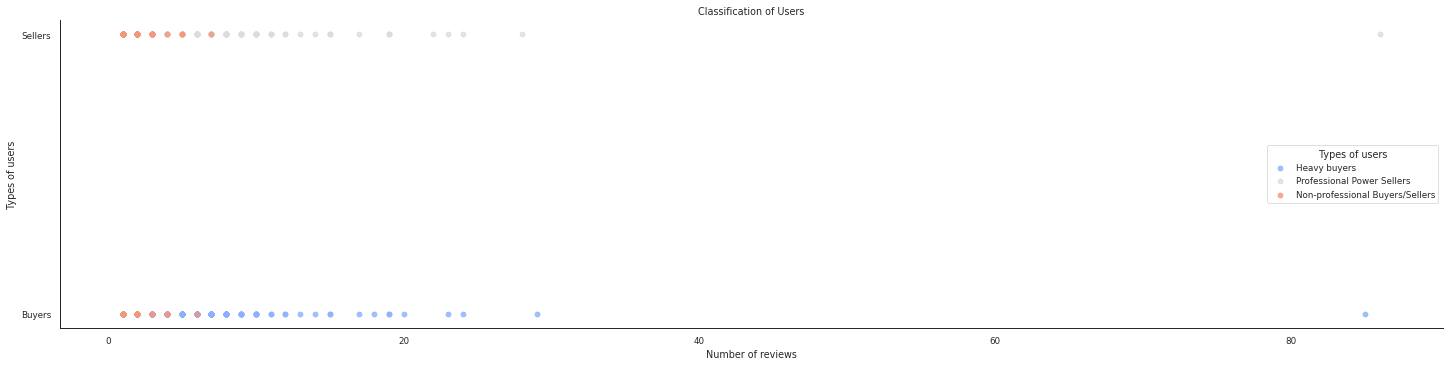

In [89]:
# Scatterplot of the types of users

sns.lmplot('nof_reviews', 'ratingType', data=ratings_df, hue='cluster', palette='coolwarm', height=5, aspect=4, fit_reg = False, seed = 10, legend=False,)
plt.legend(title='Types of users', labels=['Heavy buyers', 'Professional Power Sellers','Non-professional Buyers/Sellers'])
plt.title('Classification of Users')
plt.xlabel('Number of reviews')
plt.ylabel('Types of users')
plt.yticks([0,1], labels=['Buyers', 'Sellers'])
plt.show()

#### ANSWER: Using an unsupervised classification model, it is possible to see 3 different typs of users:


*   Non-professional Buyers/Sellers: Non-professional users that make a normal use of the platform.
*   Heavy Buyers: Non-professional users that have a much higher buying pattern on the platform.
* Power sellers: Sellers who have moved from selling as a hobby or source of supplemental income to running a full-time business in the marketplace.

